## Crypto Arbitrage

In this notebook we will look at 2 different crypto exchanges over a 3 month peroid


###  First we import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

###  Using the Pandas `read_csv` function and the `Path` module, we create a dataframe from bitstamp.csv

In [2]:
bspath=Path("bitstamp.csv")
bitstamp = pd.read_csv(bspath)

### Previewing the data with pandas 'head' function

In [3]:
bitstamp.head()

,Timestamp,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
0,2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
1,2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2,2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
3,2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
4,2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Now we do the same for coinbase

In [4]:
cbpath=Path("coinbase.csv")
coinbase = pd.read_csv(cbpath)

In [5]:
coinbase.head()

,Timestamp,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
0,2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
1,2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2,2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
3,2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
4,2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Preparing the Data

### For the bitstamp DataFrame, drop all `NaN` values

In [6]:
bitstamp.dropna()

,Timestamp,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
0,2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
1,2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2,2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
3,2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
4,2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...,...
129535,2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
129536,2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
129537,2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
129538,2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007


### Use  `str.replace`  to remove the dollar signs ($) from the values in the Close column.

In [7]:
bitstamp['Close']=bitstamp['Close'].str.replace('$','')
#previewing the data to see it worked
bitstamp.head()

C:\Users\somebody\AppData\Local\Temp/ipykernel_6548/50947326.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp['Close']=bitstamp['Close'].str.replace('$','')


,Timestamp,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
0,2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
1,2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2,2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
3,2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
4,2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Convert the data type of the Close column to a `float`.

In [8]:
bitstamp['Close']=bitstamp['Close'].astype(float)

### Drop duplicate values

In [9]:
bitstamp.drop_duplicates()

,Timestamp,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
0,2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
1,2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2,2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
3,2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
4,2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...,...
129535,2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
129536,2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
129537,2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106
129538,2018-03-31 23:58:00,6927.65,6929.42,6927.65,6927.65,0.839507,5817.007705,6929.080007


### We repeat this for the coinbase.csv file

In [10]:
coinbase.dropna()
coinbase['Close']=coinbase['Close'].str.replace('$','')
coinbase['Close']=coinbase['Close'].astype(float)
coinbase.drop_duplicates()

C:\Users\somebody\AppData\Local\Temp/ipykernel_6548/309118330.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase['Close']=coinbase['Close'].str.replace('$','')


,Timestamp,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
0,2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
1,2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2,2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
3,2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
4,2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...,...
129535,2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
129536,2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
129537,2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747
129538,2018-03-31 23:58:00,6933.91,6938.00,6933.90,6937.31,0.133413,925.356547,6936.048538


## Analyzing the Data

### Selecting both close and timestamp for the new dataframes


In [11]:
bitstamp_sliced = bitstamp[['Timestamp','Close']]
bitstamp_sliced.head()

,Timestamp,Close
0,2018-01-01 00:00:00,13646.48
1,2018-01-01 00:01:00,13658.75
2,2018-01-01 00:02:00,13610.22
3,2018-01-01 00:03:00,13639.09
4,2018-01-01 00:04:00,13620.00


In [12]:
coinbase_sliced =coinbase[['Timestamp','Close']]
coinbase_sliced.head()

,Timestamp,Close
0,2018-01-01 00:00:00,13608.49
1,2018-01-01 00:01:00,13601.66
2,2018-01-01 00:02:00,13580.00
3,2018-01-01 00:03:00,13550.34
4,2018-01-01 00:04:00,13583.44


### Statistics and plots


In [13]:
#stats for bitstamp
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [14]:
#stats for coinbase
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp whole period'}, xlabel='Timestamp'>

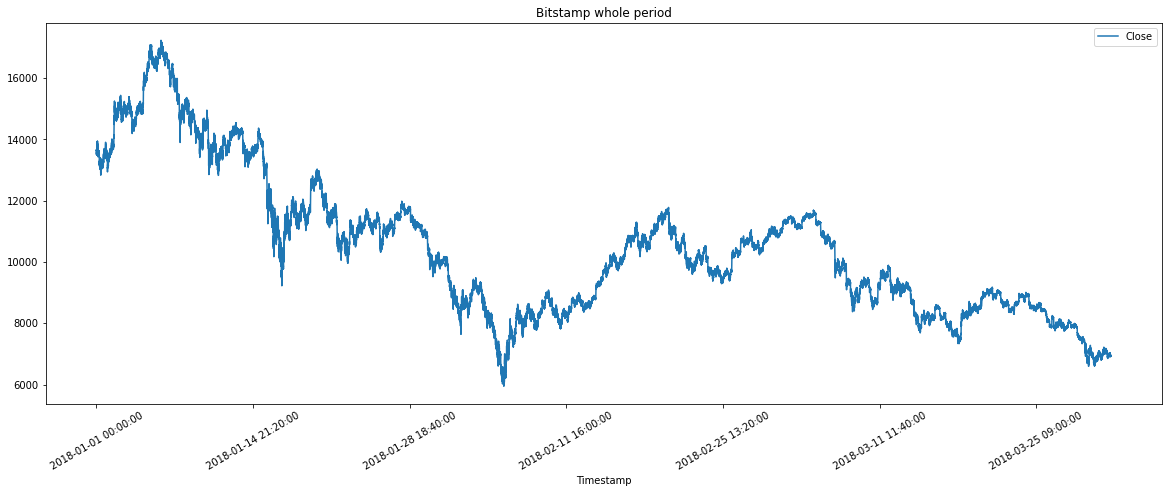

In [15]:
#bitstamp plot
bitstamp_sliced.plot(figsize=(20,7),title='Bitstamp whole period',rot=30,x='Timestamp')

<AxesSubplot:title={'center':'Coinbase whole period'}, xlabel='Timestamp'>

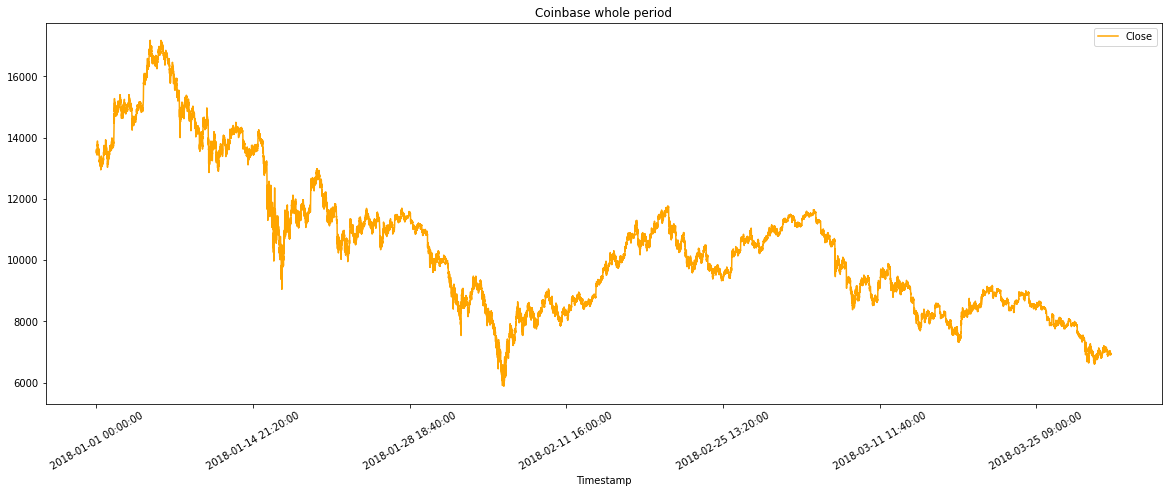

In [16]:
#coinbase plot
coinbase_sliced.plot(figsize=(20,7),title='Coinbase whole period',rot=30,x='Timestamp',color="orange")

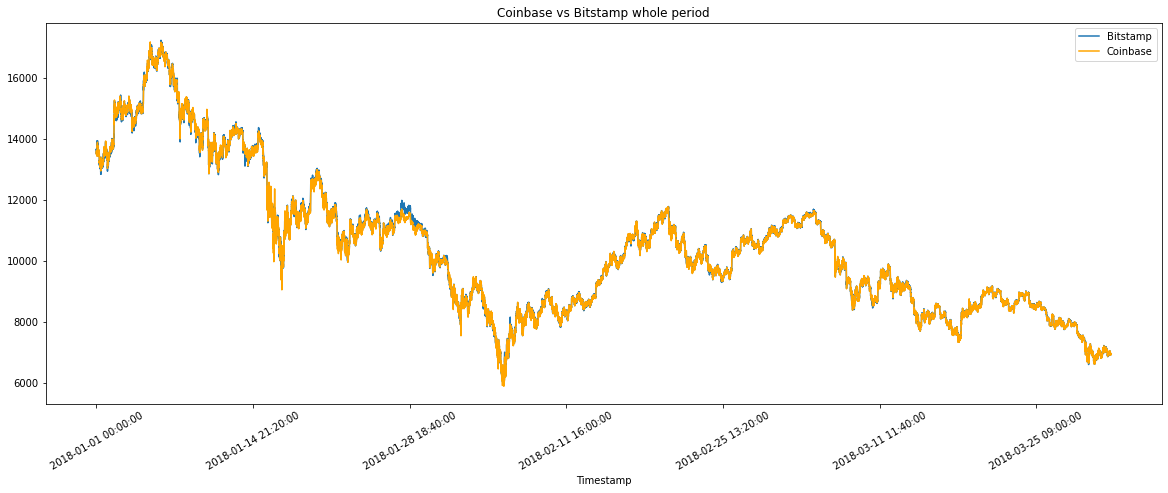

In [17]:
#plot overlay
ax=bitstamp_sliced.plot(figsize=(20,7),title='Bitstamp whole period',rot=30,x='Timestamp')
coinbase_sliced.plot(figsize=(20,7),title='Coinbase vs Bitstamp whole period',rot=30,x='Timestamp',color="orange",ax=ax).legend(['Bitstamp','Coinbase'])

### Looking at the first of each month


In [18]:
#split date and time in each of the dataframes
coinbase_sliced['date']=pd.to_datetime(coinbase_sliced['Timestamp']).dt.date
bitstamp_sliced['date']=pd.to_datetime(bitstamp_sliced['Timestamp']).dt.date
#preview it worked
coinbase_sliced

C:\Users\somebody\AppData\Local\Temp/ipykernel_6548/3403513760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coinbase_sliced['date']=pd.to_datetime(coinbase_sliced['Timestamp']).dt.date
C:\Users\somebody\AppData\Local\Temp/ipykernel_6548/3403513760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitstamp_sliced['date']=pd.to_datetime(bitstamp_sliced['Timestamp']).dt.date


,Timestamp,Close,date
0,2018-01-01 00:00:00,13608.49,2018-01-01
1,2018-01-01 00:01:00,13601.66,2018-01-01
2,2018-01-01 00:02:00,13580.00,2018-01-01
3,2018-01-01 00:03:00,13550.34,2018-01-01
4,2018-01-01 00:04:00,13583.44,2018-01-01
...,...,...,...
129535,2018-03-31 23:55:00,6930.00,2018-03-31
129536,2018-03-31 23:56:00,6930.01,2018-03-31
129537,2018-03-31 23:57:00,6933.91,2018-03-31
129538,2018-03-31 23:58:00,6937.31,2018-03-31


C:\Users\somebody\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


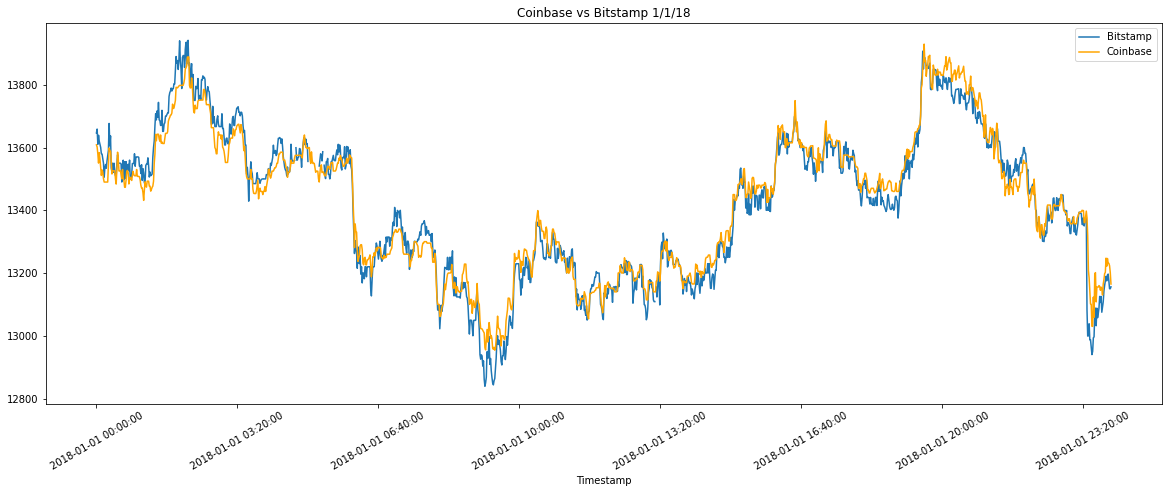

In [19]:
#create a mask to get the selected dates
mask = (bitstamp_sliced['date'] >= pd.to_datetime('2018-01-01')) & (bitstamp_sliced['date'] < pd.to_datetime('2018-01-02'))
#plot just 1/1/18
ax=bitstamp_sliced.loc[mask].plot(figsize=(20,7),title='Bitstamp whole period',rot=30,x='Timestamp')
coinbase_sliced.loc[mask].plot(figsize=(20,7),title='Coinbase vs Bitstamp 1/1/18',rot=30,x='Timestamp',color="orange",ax=ax).legend(['Bitstamp','Coinbase'])

C:\Users\somebody\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


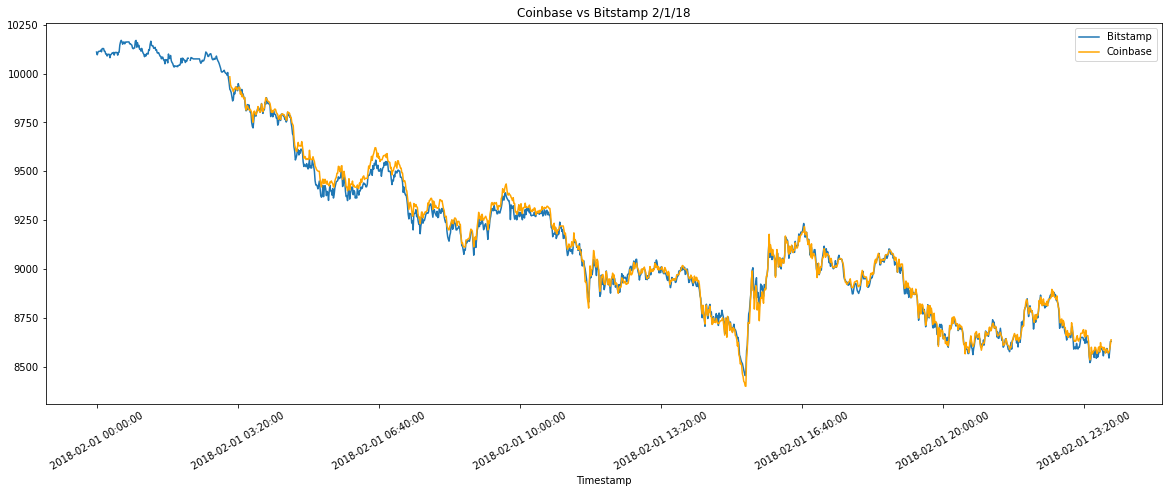

In [20]:
#create a mask to get the selected dates
mask = (bitstamp_sliced['date'] >= pd.to_datetime('2018-02-01')) & (bitstamp_sliced['date'] < pd.to_datetime('2018-02-02'))
#plot just 2/1/18
ax=bitstamp_sliced.loc[mask].plot(figsize=(20,7),title='Bitstamp whole period',rot=30,x='Timestamp')
coinbase_sliced.loc[mask].plot(figsize=(20,7),title='Coinbase vs Bitstamp 2/1/18',rot=30,x='Timestamp',color="orange",ax=ax).legend(['Bitstamp','Coinbase'])

C:\Users\somebody\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


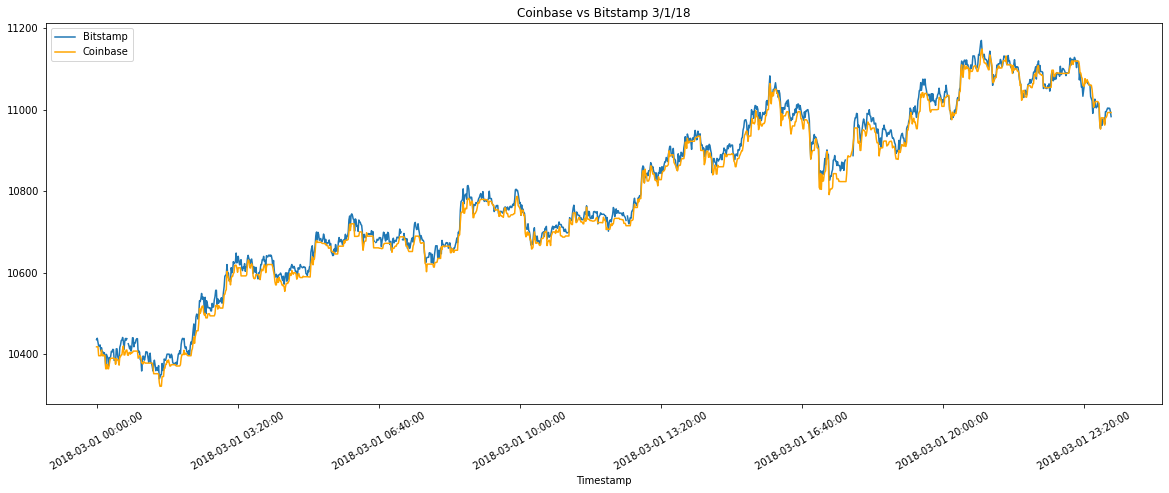

In [21]:
#create a mask to get the selected dates
mask = (bitstamp_sliced['date'] >= pd.to_datetime('2018-03-01')) & (bitstamp_sliced['date'] < pd.to_datetime('2018-03-02'))
#plot just 3/1/18
ax=bitstamp_sliced.loc[mask].plot(figsize=(20,7),title='Bitstamp whole period',rot=30,x='Timestamp')
coinbase_sliced.loc[mask].plot(figsize=(20,7),title='Coinbase vs Bitstamp 3/1/18',rot=30,x='Timestamp',color="orange",ax=ax).legend(['Bitstamp','Coinbase'])

As seen above, the spread had decreased as the peroid went on. There are much larger margins present in the first month than the last

In [22]:
coinbase_sliced.loc[mask]

,Timestamp,Close,date
84960,2018-03-01 00:00:00,10418.00,2018-03-01
84961,2018-03-01 00:01:00,10417.99,2018-03-01
84962,2018-03-01 00:02:00,10417.99,2018-03-01
84963,2018-03-01 00:03:00,10396.14,2018-03-01
84964,2018-03-01 00:04:00,10396.14,2018-03-01
...,...,...,...
86395,2018-03-01 23:55:00,10993.02,2018-03-01
86396,2018-03-01 23:56:00,10993.01,2018-03-01
86397,2018-03-01 23:57:00,10993.02,2018-03-01
86398,2018-03-01 23:58:00,10993.02,2018-03-01


### Looking at the spreads in each date

In [23]:
# Using the early date that you have selected, calculate the arbitrage spread 
spread_early=coinbase_sliced['Close'].iloc[0:1439]-bitstamp_sliced['Close'].iloc[0:1439]
spread_early.describe()

count    1420.000000
mean        5.765155
std        46.230717
min      -142.000000
25%       -26.957500
50%         5.475000
75%        36.015000
max       319.990000
Name: Close, dtype: float64

<AxesSubplot:>

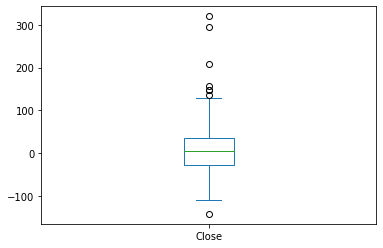

In [24]:
spread_early.plot.box()

In [25]:
spread_middle=coinbase_sliced['Close'].iloc[44640:46079]-bitstamp_sliced['Close'].iloc[44640:46079]
spread_middle.describe()

count    1250.000000
mean       13.961032
std        25.430233
min      -115.930000
25%        -0.960000
50%        13.875000
75%        30.807500
max       125.180000
Name: Close, dtype: float64

<AxesSubplot:>

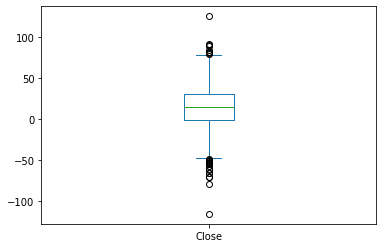

In [26]:
spread_middle.plot.box()

In [27]:
spread_late=bitstamp_sliced['Close'].iloc[84960:86399]-coinbase_sliced['Close'].iloc[84960:86399]
spread_late.describe()

count    1424.000000
mean       14.472451
std        12.514745
min       -41.100000
25%         6.120000
50%        14.485000
75%        22.875000
max        52.860000
Name: Close, dtype: float64

<AxesSubplot:>

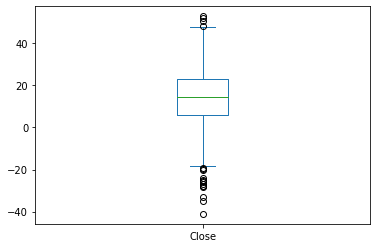

In [28]:
spread_late.plot.box()

### Calculating the Arbitrage Profits
We opperate under the assumption that we buy and sell the assets on each exchange simulationiously, and at closing price

#### We start with the arbitrage math to ultimately calculate the profit per trade

In [29]:
#start with the difference between the two exchanges
spread_early=coinbase_sliced['Close'].iloc[0:1439]-bitstamp_sliced['Close'].iloc[0:1439]
spread_middle=coinbase_sliced['Close'].iloc[44640:46079]-bitstamp_sliced['Close'].iloc[44640:46079]
spread_late=coinbase_sliced['Close'].iloc[84960:86399]-bitstamp_sliced['Close'].iloc[84960:86399]

#filter out the negative trades
return_early=spread_early[spread_early>0]/bitstamp_sliced['Close'].iloc[0:1439]
return_middle=spread_middle[spread_middle>0]/bitstamp_sliced['Close'].iloc[44640:46079]
return_late=spread_late[spread_late>0]/bitstamp_sliced['Close'].iloc[84960:86399]

#finding the trades that profit over 1%
early_trades=return_early[return_early>.01]
middle_trades=return_middle[return_middle>.01]
late_trades=return_late[return_late>.01]

#finding profit per trade
profit_early=early_trades*bitstamp_sliced['Close'].iloc[0:1439]
profit_middle=middle_trades*bitstamp_sliced['Close'].iloc[44640:46079]
profit_late=late_trades*bitstamp_sliced['Close'].iloc[84960:86399]

#drop NaN
profit_early=profit_early.dropna()
profit_middle=profit_middle.dropna()
profit_late=profit_late.dropna()


In [30]:
#potential profit 1/1/18
profit_early.sum()

1406.3999999999996

In [31]:
#potential profit 2/1/18
profit_middle.sum()

125.18000000000029

In [32]:
#no profitable trades on this date
profit_late

Series([], Name: Close, dtype: float64)

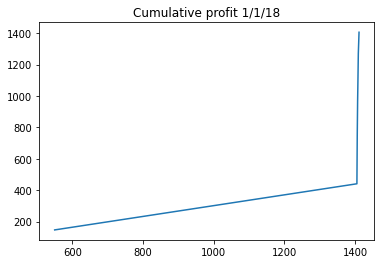

In [33]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_early.cumsum().plot(title="Cumulative profit 1/1/18")

<AxesSubplot:title={'center':'cumulative profit 2/1/18 kind of (only 1 profitable trade)'}>

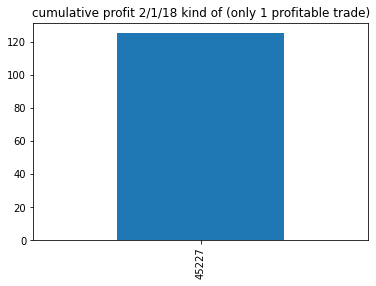

In [34]:
profit_middle.plot.bar(title="cumulative profit 2/1/18 kind of (only 1 profitable trade)")

In [35]:
profit_late.size

0

Further confirming our results from before, the spreads were larger and more profitable in the earier times during this peroid.